In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Nadam
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
from datetime import datetime

In [21]:
df1 = pd.read_csv("Updated_Houses.csv", encoding = "utf-8")

In [22]:
df1.head

<bound method NDFrame.head of        district      city  floor       price  rooms     sq  year  \
0       Mokotów  Warszawa      2  1925000.00      2  71.00  2008   
1      Grunwald    Poznań      3   459000.00      2  43.39  1900   
2      Grunwald    Poznań      2   459000.00      2  43.38  1900   
3      Grunwald    Poznań      3   880000.00      3  91.88  1900   
4      Grunwald    Poznań      3   880000.00      3  91.88  1900   
...         ...       ...    ...         ...    ...    ...   ...   
37602      Wola  Warszawa      2   749541.60      2  45.24  2021   
37603   Mokotów  Warszawa      9  1300077.00      4  73.50  2021   
37604    Bemowo  Warszawa      0   857034.00      3  53.00  2010   
37605    Włochy  Warszawa      4  1321866.00      3  71.00  2017   
37606   Ursynów  Warszawa      2   878532.48      3  63.00  1978   

       price_per_sq update_date  \
0          27113.00  2024-07-04   
1          10578.00  2024-07-04   
2          10581.00  2024-07-04   
3           9

In [23]:
def remove_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('city'):
        m = np.mean(subdf.price_per_sq)
        st = np.std(subdf.price_per_sq)
        reduced_df = subdf[(subdf.price_per_sq>(m-st)) & (subdf.price_per_sq <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df2 = remove_outliers(df1)

In [24]:
df2.shape

(29885, 10)

In [25]:
df2.isnull().sum()

district            0
city                0
floor               0
price               0
rooms               0
sq                  0
year                0
price_per_sq        0
update_date         0
offer_url       16681
dtype: int64

In [26]:
print(f'Krk:{len(df2[df2.city == "Kraków"].district.unique())}')
print(f'WWa:{len(df2[df2.city == "Warszawa"].district.unique())}')
print(f'Pzn:{len(df2[df2.city == "Poznań"].district.unique())}')

Krk:18
WWa:18
Pzn:5


In [27]:
districts = np.sort(df2[(df2.city == "Kraków")].district.unique())

In [28]:
districts

array(['Bieńczyce', 'Bieżanów-Prokocim', 'Bronowice', 'Czyżyny',
       'Dębniki', 'Grzegórzki', 'Krowodrza', 'Mistrzejowice', 'Nowa Huta',
       'Podgórze', 'Podgórze Duchackie', 'Prądnik Biały',
       'Prądnik Czerwony', 'Stare Miasto', 'Swoszowice',
       'Wzgórza Krzesławickie', 'Zwierzyniec', 'Łagiewniki-Borek Fałęcki'],
      dtype=object)

In [29]:
dummies = pd.get_dummies(df2.city)
df3 = pd.concat([df2,dummies],axis='columns')
df3.head(4)

,district,city,floor,price,rooms,sq,year,price_per_sq,update_date,offer_url,Kraków,Poznań,Warszawa
0,Prądnik Biały,Kraków,4,749000.0,2,42.01,2023,17829.0,2024-07-04,https://www.otodom.pl/pl/oferta/2-pokoje-widok...,True,False,False
1,Podgórze Duchackie,Kraków,2,649000.0,2,42.99,2023,15097.0,2024-07-04,https://www.otodom.pl/pl/oferta/wyjatkowe-mies...,True,False,False
2,Podgórze Duchackie,Kraków,2,649000.0,2,42.99,2023,15097.0,2024-07-04,https://www.otodom.pl/pl/oferta/nowe-mieszkani...,True,False,False
3,Podgórze Duchackie,Kraków,8,655000.0,2,36.50,2023,17945.0,2024-07-04,https://www.otodom.pl/pl/oferta/gotowe-dwustro...,True,False,False


In [30]:
dummies = pd.get_dummies(df2.district)
df3 = pd.concat([df3,dummies],axis='columns')
df3.head(4)

,district,city,floor,price,rooms,sq,year,price_per_sq,update_date,offer_url,...,Wesoła,Wilanów,Wilda,Wola,Wzgórza Krzesławickie,Włochy,Zwierzyniec,Łagiewniki-Borek Fałęcki,Śródmieście,Żoliborz
0,Prądnik Biały,Kraków,4,749000.0,2,42.01,2023,17829.0,2024-07-04,https://www.otodom.pl/pl/oferta/2-pokoje-widok...,...,False,False,False,False,False,False,False,False,False,False
1,Podgórze Duchackie,Kraków,2,649000.0,2,42.99,2023,15097.0,2024-07-04,https://www.otodom.pl/pl/oferta/wyjatkowe-mies...,...,False,False,False,False,False,False,False,False,False,False
2,Podgórze Duchackie,Kraków,2,649000.0,2,42.99,2023,15097.0,2024-07-04,https://www.otodom.pl/pl/oferta/nowe-mieszkani...,...,False,False,False,False,False,False,False,False,False,False
3,Podgórze Duchackie,Kraków,8,655000.0,2,36.50,2023,17945.0,2024-07-04,https://www.otodom.pl/pl/oferta/gotowe-dwustro...,...,False,False,False,False,False,False,False,False,False,False


In [53]:
X = df3.drop(['price',"district", "update_date", "city", "offer_url", "price_per_sq"], axis='columns')
X_columns = X.columns

In [54]:
y = df3.price

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

In [34]:
# Ustawienie wszystkich wag na 1
weights = [1 for i in range(len(X_train.columns))]

temp_weights = weights.copy()
samples_splited_by_weight = []

min_weight = 2
max_weight = 2
# Ustawienie zakresu wag dla testów
for weight_value in range(min_weight, max_weight+1, 1):
    # Nazwy próbek
    # Tu można dodawać swoje propozycje. Żeby nie testować wszystkich, można zakomentować niepotrzebne
    # Jako klucz podaje się zbiór próbek oddzielonych '_', a jako wartość wagi
    sample_names = {
        "Cities": [weight_value], 
        #"Districts": [weight_value], 
        
    }
    samples_splited_by_weight.append(sample_names)

sample_names_keys = list(samples_splited_by_weight[0].keys())

def change_weight(column_name, new_weight):
    index = np.where(X.columns==column_name)[0][0]
    weights[index] = new_weight

# Próbka dla wyższych wag miast
def cities_sample(weight_value):
    for city in ["Kraków", "Warszawa","Poznań"]:
        change_weight(city, weight_value) 

# Próbka dla wyższych wag dzielnic
def districts_sample(weight_value):
    for index in range(7, len(X.columns)):
        weights[index] = weight_value   

# Próbka dla wyższych wag parametrów
def params_sample(weight_value):
    for index in range(0, 4):
        weights[index] = weight_value

# Próbka dla wyższej wagi wybranego parametru
def param_sample(weight_value, param_name):
    index = np.where(X.columns==param_name)[0][0]
    weights[index] = weight_value

In [35]:
X_train.shape[1]

47

In [36]:
import re

def keep_letters(input_string):
    return re.sub(r'[^a-zA-Z]', '', input_string)
    
weighted_weights = []
for sample_names in samples_splited_by_weight:  
    weights_samples = []
    sample_names_keys = list(sample_names.keys())
    for name, weight in sample_names.items():
        samples = name.split("_")
        for i, sample in enumerate(samples):
            if "Params" in sample:
                params_sample(weight[i])
            elif "Districts" in sample:
                districts_sample(weight[i])
            elif "Cities" in sample:
                cities_sample(weight[i])
            else:
                param_sample(weight[i], keep_letters(sample.lower()))           
        weights_samples.append(weights)
        weights = temp_weights.copy()
        
    weighted_weights.append(weights_samples)

In [37]:
test_weights = np.array(weights) 
test_sample_weights = np.dot(X_train, test_weights)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [39]:
print("Mean of scaled training data:", X_train_scaled.mean(axis=0))
print("Standard deviation of scaled training data:", X_train_scaled.std(axis=0))


Mean of scaled training data: [-4.07162267e-17 -4.16078229e-17  2.86499581e-16 -1.58763564e-15
  4.57686052e-17  1.22297279e-16  1.54543342e-17 -1.84263216e-17
  6.41949268e-17 -8.32156458e-18  1.60487317e-17 -5.79537533e-17
 -2.49646937e-17 -1.78319241e-18  4.16078229e-18 -9.86699800e-17
 -1.42655393e-17  9.51035952e-18  3.26918609e-17 -5.08209837e-17
  4.16078229e-17  2.49646937e-17  8.12838540e-17  4.45798103e-17
 -6.98417027e-17  2.67478862e-17  4.99293875e-17  3.95274318e-17
  6.24117344e-18 -3.95274318e-17 -9.51035952e-18  5.55761635e-17
 -2.37758988e-18 -1.54543342e-17 -4.75517976e-17  5.23069774e-17
 -3.09086684e-17  1.11449526e-17 -2.85310786e-17 -3.15030659e-17
 -3.20974634e-17  6.53837217e-18  7.84604661e-17 -5.46845672e-17
 -2.43702963e-17  5.05237850e-18 -1.54543342e-17]
Standard deviation of scaled training data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [40]:
weighted_weights[0][0]

[1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [55]:
from datetime import datetime

# Można sobie testować włączając True. Dla tego zestawu robi się to parę godzin
weights_experiments = True 

# Ustawiamy, czy chcemy mieć przeskalowane dane // ogółem to wyniki są słabsze
scaled_data = True
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

#weights = [1 for i in range(len(X_train.columns))]

if scaled_data:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    

if weights_experiments:
    results = {}
    w = min_weight
    reps = 1
    # Ilość powtórzeń dla modeli o tych samych wagach dla dokładniejszych wyników
    for weights_samples in weighted_weights: 
        for ww in range(len(weighted_weights[0])):
            results[sample_names_keys[ww]] = 0
            
        for i, current_weights in enumerate(weights_samples):
            for rep in range(reps):
                print(f'weight {w}/{max_weight}, sample {i}/{len(weights_samples)-1}')
                current_weights = np.array(current_weights) 
                sample_weights = np.dot(X_train, current_weights)
                sample_weights_tensor = tf.convert_to_tensor(sample_weights, dtype=tf.float32)
                
                # Definicja modelu artificial neural network
                join_model = Sequential([
                    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
                    Dense(32, activation='relu'),
                    Dense(1) 
                ])
                # Kompilowanie modelu
                
                join_model.compile(optimizer=Nadam(), loss='mean_squared_error', metrics=['mse', 'mae'])
                
                # Trenowanie modelu
                history = join_model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2, sample_weight=sample_weights_tensor)
                
                test_loss, test_mse, test_mae = join_model.evaluate(X_test_scaled, y_test)
                
                # Sprawdzanie wyniku modelu
                y_pred = join_model.predict(X_test_scaled)
                
                r2 = r2_score(y_test, y_pred)
                results[sample_names_keys[i]] += r2
          
        current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
        with open("results.txt", "a", encoding="utf-8") as file:
            file.write(f"\n\n=== Wyniki dla wywołania z danymi {'przeskalowanymi' if scaled_data else 'nieprzeskalowanymi'} z ")
            file.write(current_time)
            file.write(" ===\n")
            print(results)
            for key, value in results.items():
                print(f'{key}: {value/reps}')
                if value > 0:
                    file.write(f"{key} {samples_splited_by_weight[w-min_weight][key]}: {value/reps}\n")
                    print(f'{key}: {value/reps}')
        w += 1 

weight 2/2, sample 0/0
Epoch 1/30


C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2086822469435392.0000 - mae: 883032.8750 - mse: 988073361408.0000 - val_loss: 2015717272584192.0000 - val_mae: 876656.0000 - val_mse: 961120632832.0000
Epoch 2/30
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2065491782795264.0000 - mae: 875914.7500 - mse: 979463045120.0000 - val_loss: 1897891018833920.0000 - val_mae: 849023.8125 - val_mse: 904699314176.0000
Epoch 3/30
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step - loss: 1858856208564224.0000 - mae: 839319.4375 - mse: 886116515840.0000 - val_loss: 1640605969022976.0000 - val_mae: 785629.0000 - val_mse: 781558611968.0000
Epoch 4/30
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - loss: 1569341992599552.0000 - mae: 764322.3750 - mse: 747205427200.0000 - val_loss: 1273424785702912.0000 - val_mae: 683235.0000 - val_mse: 605886283776.0000
Epoch 5/30
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1206687570591744.0000 - mae: 656912.5000 - mse: 572581806080.0000 - val_loss: 884454629310464.0000 

In [24]:
weights = [1 for i in range(len(X_train.columns))]
param_sample(7, "year")
param_sample(0.1, "rooms")
districts_sample(5)


current_weights = np.array(weights) 
sample_weights = np.dot(X_train, current_weights)
sample_weights_tensor = tf.convert_to_tensor(sample_weights, dtype=tf.float32)

# Definicja modelu artificial neural network
split_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) 
])
# Kompilowanie modelu

split_model.compile(optimizer=Nadam(), loss='mean_squared_error', metrics=['mse', 'mae'])

# Trenowanie modelu
history = split_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, sample_weight=sample_weights_tensor)

test_loss, test_mse, test_mae = split_model.evaluate(X_test, y_test)

# Sprawdzanie wyniku modelu
y_pred = split_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)

Epoch 1/50


C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 12422822462750720.0000 - mae: 816693.1250 - mse: 880845979648.0000 - val_loss: 2798843087290368.0000 - val_mae: 266998.3750 - val_mse: 198269157376.0000
Epoch 2/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3296898232352768.0000 - mae: 282930.0938 - mse: 230930644992.0000 - val_loss: 2599144824766464.0000 - val_mae: 285569.2188 - val_mse: 184226201600.0000
Epoch 3/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3032362338222080.0000 - mae: 291036.5938 - mse: 213596127232.0000 - val_loss: 2560804725456896.0000 - val_mae: 282905.5312 - val_mse: 181505458176.0000
Epoch 4/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2805481764552704.0000 - mae: 284987.1250 - mse: 197863899136.0000 - val_loss: 2517332408664064.0000 - val_mae: 277638.9375 - val_mse: 178411700224.0000
Epoch 5/50
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3017598925012992.0000 - mae: 286842.1875 - mse: 212144078848.0000 - val_loss: 2473792983007232.0000 - 

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


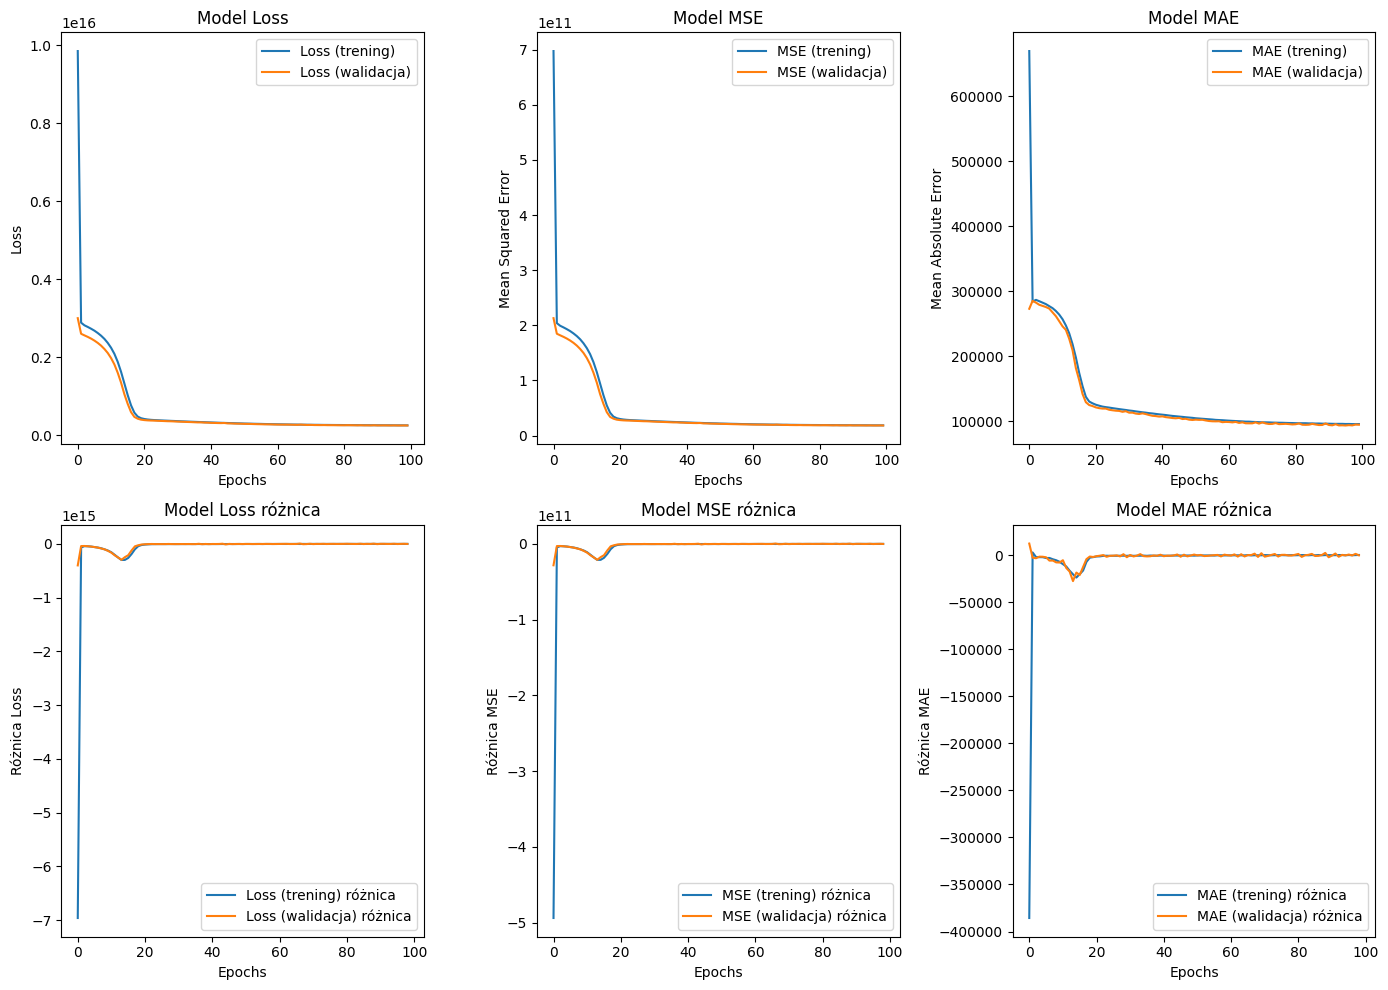

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Sprawdź dostępne klucze w history.history
print(history.history.keys())

# Oblicz różnice między kolejnymi epokami dla metryk
loss_diff = np.diff(history.history['loss'])
val_loss_diff = np.diff(history.history['val_loss'])
mse_diff = np.diff(history.history['mse'])
val_mse_diff = np.diff(history.history['val_mse'])
mae_diff = np.diff(history.history['mae'])
val_mae_diff = np.diff(history.history['val_mae'])

# Wykres dla strat i metryk
plt.figure(figsize=(14, 10))

# Wykres Loss
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='Loss (trening)')
plt.plot(history.history['val_loss'], label='Loss (walidacja)')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Wykres MSE
plt.subplot(2, 3, 2)
plt.plot(history.history['mse'], label='MSE (trening)')
plt.plot(history.history['val_mse'], label='MSE (walidacja)')
plt.title('Model MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

# Wykres MAE
plt.subplot(2, 3, 3)
plt.plot(history.history['mae'], label='MAE (trening)')
plt.plot(history.history['val_mae'], label='MAE (walidacja)')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

# Wykres różnic Loss
plt.subplot(2, 3, 4)
plt.plot(loss_diff, label='Loss (trening) różnica')
plt.plot(val_loss_diff, label='Loss (walidacja) różnica')
plt.title('Model Loss różnica')
plt.xlabel('Epochs')
plt.ylabel('Różnica Loss')
plt.legend()

# Wykres różnic MSE
plt.subplot(2, 3, 5)
plt.plot(mse_diff, label='MSE (trening) różnica')
plt.plot(val_mse_diff, label='MSE (walidacja) różnica')
plt.title('Model MSE różnica')
plt.xlabel('Epochs')
plt.ylabel('Różnica MSE')
plt.legend()

# Wykres różnic MAE
plt.subplot(2, 3, 6)
plt.plot(mae_diff, label='MAE (trening) różnica')
plt.plot(val_mae_diff, label='MAE (walidacja) różnica')
plt.title('Model MAE różnica')
plt.xlabel('Epochs')
plt.ylabel('Różnica MAE')
plt.legend()

plt.tight_layout()
plt.show()



In [20]:
def predict_price_tf(city, district, floor, rooms, sq, year, model):
    district_index = np.where(X.columns==district)[0][0]
    city_index = np.where(X.columns==city)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = floor
    x[1] = rooms
    x[2] = sq
    x[3] = year
    if district_index >= 0:
        x[district_index] = 1
    if city_index >= 0:
        x[city_index] = 1

    x = x.reshape(1, -1)
    return model.predict(x)[0][0]

In [21]:
print(predict_price_tf('Kraków','Nowa Huta', 2.0, 1.0, 34.55, 2022.0, split_model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
543465.4


In [22]:
# import pickle
# with open('house_prices_ann_model.pickle', 'wb') as f:
#    pickle.dump(ann_model, f)

In [23]:
X_columns

Index(['floor', 'rooms', 'sq', 'year', 'Kraków', 'Poznań', 'Warszawa',
       'Bemowo', 'Białołęka', 'Bielany', 'Bieńczyce', 'Bieżanów-Prokocim',
       'Bronowice', 'Czyżyny', 'Dębniki', 'Grunwald', 'Grzegórzki', 'Jeżyce',
       'Krowodrza', 'Mistrzejowice', 'Mokotów', 'Nowa Huta', 'Nowe Miasto',
       'Ochota', 'Podgórze', 'Podgórze Duchackie', 'Praga-Południe',
       'Praga-Północ', 'Prądnik Biały', 'Prądnik Czerwony', 'Rembertów',
       'Stare Miasto', 'Swoszowice', 'Targówek', 'Ursus', 'Ursynów', 'Wawer',
       'Wesoła', 'Wilanów', 'Wilda', 'Wola', 'Wzgórza Krzesławickie', 'Włochy',
       'Zwierzyniec', 'Łagiewniki-Borek Fałęcki', 'Śródmieście', 'Żoliborz'],
      dtype='object')

In [24]:
import json
columns = {
    'data_columns': [col.lower() for col in X_columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))

In [42]:
df4 = pd.read_csv("Houses_joined_city_district.csv", encoding = "utf-8")

In [43]:
df5 = remove_outliers(df4)

In [44]:
df4.shape

(37607, 10)

In [45]:
df5.shape

(29885, 10)

In [46]:
dummies = pd.get_dummies(df5.district)
df5 = pd.concat([df5,dummies],axis='columns')
df5.head(4)

,district,city,floor,price,rooms,sq,year,price_per_sq,update_date,offer_url,...,Warszawa_Targówek,Warszawa_Ursus,Warszawa_Ursynów,Warszawa_Wawer,Warszawa_Wesoła,Warszawa_Wilanów,Warszawa_Wola,Warszawa_Włochy,Warszawa_Śródmieście,Warszawa_Żoliborz
0,Kraków_Prądnik Biały,Kraków,4,749000.0,2,42.01,2023,17829.0,2024-07-04,https://www.otodom.pl/pl/oferta/2-pokoje-widok...,...,False,False,False,False,False,False,False,False,False,False
1,Kraków_Podgórze Duchackie,Kraków,2,649000.0,2,42.99,2023,15097.0,2024-07-04,https://www.otodom.pl/pl/oferta/wyjatkowe-mies...,...,False,False,False,False,False,False,False,False,False,False
2,Kraków_Podgórze Duchackie,Kraków,2,649000.0,2,42.99,2023,15097.0,2024-07-04,https://www.otodom.pl/pl/oferta/nowe-mieszkani...,...,False,False,False,False,False,False,False,False,False,False
3,Kraków_Podgórze Duchackie,Kraków,8,655000.0,2,36.50,2023,17945.0,2024-07-04,https://www.otodom.pl/pl/oferta/gotowe-dwustro...,...,False,False,False,False,False,False,False,False,False,False


In [47]:
X = df5.drop(['price',"district", "update_date", "city", "offer_url", "price_per_sq"], axis='columns')
X_columns = X.columns

In [48]:
y = df5.price

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [50]:
print("Mean of scaled training data:", X_train_scaled.mean(axis=0))
print("Standard deviation of scaled training data:", X_train_scaled.std(axis=0))


Mean of scaled training data: [-4.07162267e-17 -4.16078229e-17  2.86499581e-16 -1.58763564e-15
  4.57686052e-17  1.22297279e-16  1.54543342e-17 -1.84263216e-17
  6.41949268e-17 -8.32156458e-18  1.60487317e-17 -5.79537533e-17
 -2.49646937e-17 -1.78319241e-18  4.16078229e-18 -9.86699800e-17
 -1.42655393e-17  9.51035952e-18  3.26918609e-17 -5.08209837e-17
  4.16078229e-17  2.49646937e-17  8.12838540e-17  4.45798103e-17
 -6.98417027e-17  2.67478862e-17  4.99293875e-17  3.95274318e-17
  6.24117344e-18 -3.95274318e-17 -9.51035952e-18  5.55761635e-17
 -2.37758988e-18 -1.54543342e-17 -4.75517976e-17  5.23069774e-17
 -3.09086684e-17  1.11449526e-17 -2.85310786e-17 -3.15030659e-17
 -3.20974634e-17  6.53837217e-18  7.84604661e-17 -5.46845672e-17
 -2.43702963e-17  5.05237850e-18 -1.54543342e-17]
Standard deviation of scaled training data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [51]:
weights = [1 for i in range(len(X_train.columns))]
#param_sample(7, "year")
#param_sample(0.1, "rooms")
#districts_sample(5)

current_weights = np.array(weights) 
sample_weights = np.dot(X_train, current_weights)
sample_weights_tensor = tf.convert_to_tensor(sample_weights, dtype=tf.float32)

# Definicja modelu artificial neural network
join_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1) 
])
# Kompilowanie modelu

join_model.compile(optimizer=Nadam(), loss='mean_squared_error', metrics=['mse', 'mae'])

# Trenowanie modelu
history = join_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, sample_weight=sample_weights_tensor)

test_loss, test_mse, test_mae = join_model.evaluate(X_test_scaled, y_test)

# Sprawdzanie wyniku modelu
y_pred = join_model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
print(r2)

Epoch 1/100


C:\Users\pawel\source\repos\House_Prices_Estimating\AIenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2090340181868544.0000 - mae: 887888.8750 - mse: 995305717760.0000 - val_loss: 2015466419650560.0000 - val_mae: 876809.3125 - val_mse: 961458339840.0000
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2026076062613504.0000 - mae: 872378.4375 - mse: 962377482240.0000 - val_loss: 1894844410626048.0000 - val_mae: 848538.1250 - val_mse: 903659978752.0000
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1913383368523776.0000 - mae: 839220.7500 - mse: 905494528000.0000 - val_loss: 1634339477520384.0000 - val_mae: 783996.8125 - val_mse: 778868817920.0000
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1686635401969664.0000 - mae: 771417.5000 - mse: 793205473280.0000 - val_loss: 1269283766140928.0000 - val_mae: 681794.1875 - val_mse: 604103245824.0000
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1201870630551552.0000 - mae: 653100.0000 - mse: 568947703808.0000 - val_loss: 875479892492288.0000 

In [104]:
def predict_price_tf_new(city, district, floor, rooms, sq, year, model):
    district_index = np.where(X.columns==f'{city}_{district}')[0][0]
    x = np.zeros(len(X.columns))
    x[0] = floor
    x[1] = rooms
    x[2] = sq
    x[3] = year
    if district_index >= 0:
        x[district_index] = 1

    x = x.reshape(1, -1)
    return model.predict(x)[0][0]

In [37]:
print(predict_price_tf_new('Kraków','Stare Miasto', 3.0, 1.0, 44.55, 1936.0, join_model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
130561680.0


In [123]:
X = df5.drop(['price',"district", "update_date", "city", "offer_url", "price_per_sq"], axis='columns')
X_columns = X.columns
y = df5.price
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

margin = 0.1 * y_train
y_train_lower = y_train - margin
y_train_upper = y_train + margin

margin_test = 0.1 * y_test
y_test_lower = y_test - margin_test
y_test_upper = y_test + margin_test

In [124]:
from keras.models import Model
from keras.layers import Input, Dense

input_layer_join = Input(shape=(X_train.shape[1],))
dense1_join = Dense(64, activation='relu')(input_layer_join)
dense2_join = Dense(32, activation='relu')(dense1_join)

# Wyjście dla dolnej granicy przedziału
output_lower_join = Dense(1, name='lower_output_join')(dense2_join)

# Wyjście dla górnej granicy przedziału
output_upper_join = Dense(1, name='upper_output_join')(dense2_join)

# Kompilacja modelu z dwoma wyjściami
join_fork_model = Model(inputs=input_layer_join, outputs=[output_lower_join, output_upper_join])
join_fork_model.compile(optimizer='nadam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Trenowanie modelu
history_join = join_fork_model.fit(X_train_scaled, [y_train_lower, y_train_upper], epochs=100, batch_size=32, validation_split=0.2, sample_weight=sample_weights_tensor)

# Ewaluacja modelu
test_loss_join, test_mse_join, test_mae_join = join_fork_model.evaluate(X_test_scaled, [y_test_lower, y_test_upper])

# Sprawdzanie wyniku modelu
y_pred_lower_join, y_pred_upper_join = join_fork_model.predict(X_test_scaled)

# R^2 dla dolnych i górnych granic
r2_lower_join = r2_score(y_test_lower, y_pred_lower_join)
r2_upper_join = r2_score(y_test_upper, y_pred_upper_join)
print(f"R^2 dla dolnych granic (join_fork_model): {r2_lower_join}")
print(f"R^2 dla górnych granic (join_fork_model): {r2_upper_join}")


Epoch 1/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4129394964561920.0000 - lower_output_join_mse: 790725263360.0000 - upper_output_join_mae: 972904.8125 - val_loss: 4061976326045696.0000 - val_lower_output_join_mse: 776801157120.0000 - val_upper_output_join_mae: 963841.3125
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4190904264949760.0000 - lower_output_join_mse: 795238465536.0000 - upper_output_join_mae: 965935.2500 - val_loss: 3793754276233216.0000 - val_lower_output_join_mse: 720152625152.0000 - val_upper_output_join_mae: 931439.4375
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3736112862330880.0000 - lower_output_join_mse: 704846233600.0000 - upper_output_join_mae: 920169.5625 - val_loss: 3189579079221248.0000 - val_lower_output_join_mse: 592785702912.0000 - val_upper_output_join_mae: 855040.1250
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3079044874633216.0000 - lower_output_join_mse: 566681010176.0000 - upper_output_join

In [125]:
X = df3.drop(['price',"district", "update_date", "city", "offer_url", "price_per_sq"], axis='columns')
X_columns = X.columns
y = df3.price
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 10)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

margin = 0.1 * y_train
y_train_lower = y_train - margin
y_train_upper = y_train + margin

margin_test = 0.1 * y_test
y_test_lower = y_test - margin_test
y_test_upper = y_test + margin_test

In [126]:
from keras.models import Model
from keras.layers import Input, Dense

input_layer_split = Input(shape=(X_train.shape[1],))
dense1_split = Dense(64, activation='relu')(input_layer_split)
dense2_split = Dense(32, activation='relu')(dense1_split)

# Wyjście dla dolnej granicy przedziału
output_lower_split = Dense(1, name='lower_output_split')(dense2_split)

# Wyjście dla górnej granicy przedziału
output_upper_split = Dense(1, name='upper_output_split')(dense2_split)

# Kompilacja modelu z dwoma wyjściami
split_fork_model = Model(inputs=input_layer_split, outputs=[output_lower_split, output_upper_split])
split_fork_model.compile(optimizer='nadam', loss='mean_squared_error', metrics=['mse', 'mae'])

# Trenowanie modelu
history_split = split_fork_model.fit(X_train_scaled, [y_train_lower, y_train_upper], epochs=100, batch_size=32, validation_split=0.2, sample_weight=sample_weights_tensor)

# Ewaluacja modelu
test_loss_split, test_mse_split, test_mae_split = split_fork_model.evaluate(X_test_scaled, [y_test_lower, y_test_upper])

# Sprawdzanie wyniku modelu
y_pred_lower_split, y_pred_upper_split = split_fork_model.predict(X_test_scaled)

# R^2 dla dolnych i górnych granic
r2_lower_split = r2_score(y_test_lower, y_pred_lower_split)
r2_upper_split = r2_score(y_test_upper, y_pred_upper_split)
print(f"R^2 dla dolnych granic (split_fork_model): {r2_lower_split}")
print(f"R^2 dla górnych granic (split_fork_model): {r2_upper_split}")


Epoch 1/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 4253557905686528.0000 - lower_output_split_mse: 809473409024.0000 - upper_output_split_mae: 973970.9375 - val_loss: 4076567940562944.0000 - val_lower_output_split_mse: 779393564672.0000 - val_upper_output_split_mae: 965751.3750
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4097891111010304.0000 - lower_output_split_mse: 779723669504.0000 - upper_output_split_mae: 962422.1875 - val_loss: 3869596150923264.0000 - val_lower_output_split_mse: 734618451968.0000 - val_upper_output_split_mae: 941541.4375
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3875932569862144.0000 - lower_output_split_mse: 730850590720.0000 - upper_output_split_mae: 938229.1250 - val_loss: 3418517747531776.0000 - val_lower_output_split_mse: 637975330816.0000 - val_upper_output_split_mae: 886186.3125
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3381401713901568.0000 - lower_output_split_mse: 625225105408.0000 - uppe

In [127]:
def predict_price_tf_fork_new(city, district, floor, rooms, sq, year, model):
    X = df5.drop(['price',"district", "update_date", "city", "offer_url", "price_per_sq"], axis='columns')
    try:
        district_index = np.where(X.columns == f'{city}_{district}')[0][0]
    except IndexError:
        district_index = -1

    x = np.zeros(len(X.columns))
    x[0] = floor
    x[1] = rooms
    x[2] = sq
    x[3] = year

    if district_index >= 0:
        x[district_index] = 1

    x = x.reshape(1, -1)

    preds = model.predict(x)
    lower_pred = preds[0][0]
    upper_pred = preds[1][0]

    return lower_pred, upper_pred

In [128]:
def predict_price_tf_fork(city, district, floor, rooms, sq, year, model):
    X = df3.drop(['price',"district", "update_date", "city", "offer_url", "price_per_sq"], axis='columns')
    try:
        district_index = np.where(X.columns==district)[0][0]
        city_index = np.where(X.columns==city)[0][0]
    except IndexError:
        district_index = -1
        city_index = -1

    x = np.zeros(len(X.columns))
    x[0] = floor
    x[1] = rooms
    x[2] = sq
    x[3] = year

    if district_index >= 0:
        x[district_index] = 1
    if city_index >= 0:
        x[city_index] = 1

    x = x.reshape(1, -1)

    preds = model.predict(x)
    lower_pred = preds[0][0]
    upper_pred = preds[1][0]

    return lower_pred, upper_pred

In [132]:
print(predict_price_tf_fork_new('Kraków','Stare Miasto', 3.0, 2.0, 44.55, 1936.0, join_fork_model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
(array([1.1812602e+08], dtype=float32), array([1.443922e+08], dtype=float32))


In [130]:
# import pickle
# with open('house_prices_fork_ann_model.pickle', 'wb') as f:
#    pickle.dump(ann_model, f)

In [133]:
print(predict_price_tf_fork('Kraków','Stare Miasto', 3.0, 2.0, 44.55, 1936.0, split_fork_model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
(array([1.2183269e+08], dtype=float32), array([1.4891555e+08], dtype=float32))
